In [1]:
import numpy as np # mostly used for array computing and for advanced mathematical functions.
import pandas as pd # imports pandas package, aliases as pd
import seaborn as sns

## Exploratory Data Analytics
###### Data exploration is one of the key tasks a data analyst performs


In [2]:
insurance_premium = pd.read_csv('insurance.csv')
insurance_premium

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_premium.info() # prints information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_premium.shape # gets the number of rows and columns

(1338, 7)

In [5]:
insurance_premium.describe() # gets descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### Checking dataset for missing values and valid entries

In [6]:
insurance_premium['smoker'].value_counts(dropna = False)

no     1064
yes     274
Name: smoker, dtype: int64

## Exploratory Visualization

In [7]:
# add dataviz


In [8]:
import matplotlib.pyplot as plt

In [9]:
top_pay = insurance_premium.nlargest(8, columns=['bmi','age','charges'])

In [10]:
top_pay

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627
1047,22,male,52.58,1,yes,southeast,44501.3982
847,23,male,50.38,1,no,southeast,2438.0552
116,58,male,49.06,0,no,southeast,11381.3254
286,46,female,48.07,2,no,northeast,9432.9253
1088,52,male,47.74,1,no,southeast,9748.9106
860,37,female,47.60,2,yes,southwest,46113.5110
401,47,male,47.52,1,no,southeast,8083.9198


### Reshaping the data using aggregate functions and `groupby`

In [11]:
grouped_insurance_premium = insurance_premium.groupby('region', as_index=False)['charges'].mean() # creates a new data frame with regions as new rows and means of carges as values
grouped_insurance_premium.columns = grouped_insurance_premium.columns.str.replace('charges', 'mean_charges') # renames charges into mean_charges
grouped_insurance_premium['median_charges'] = insurance_premium.groupby('region', as_index=False)['charges'].median()['charges'] # adds a new column with median charges
grouped_insurance_premium['max_charges'] = insurance_premium.groupby('region', as_index=False)['charges'].max()['charges'] # adds a new column with maximum charges
grouped_insurance_premium['max_charges'] = insurance_premium.groupby('region', as_index=False)['charges'].min()['charges'] # adds a new column with minimum charges
grouped_insurance_premium['mean_bmi'] = insurance_premium.groupby('region', as_index=False)['bmi'].mean()['bmi']
grouped_insurance_premium['num_children'] = insurance_premium.groupby('region', as_index=False)['children'].mean()['children']
grouped_insurance_premium

,region,mean_charges,median_charges,max_charges,mean_bmi,num_children
0,northeast,13406.384516,10057.652025,1694.7964,29.173503,1.046296
1,northwest,12417.575374,8965.795750,1621.3402,29.199785,1.147692
2,southeast,14735.411438,9294.131950,1121.8739,33.355989,1.049451
3,southwest,12346.937377,8798.593000,1241.5650,30.596615,1.141538


In [12]:
insurance_premium.head(1) # checking that the original dataframe is the same as it was and was not affected by the grouping by

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


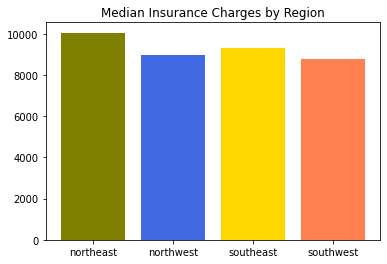

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = grouped_insurance_premium['region']
y = grouped_insurance_premium['median_charges']
colors = [ 'olive', 'royalblue', 'gold','coral']
plt.bar(x,y, color = colors)
plt.title("Median Insurance Charges by Region")
plt.show()

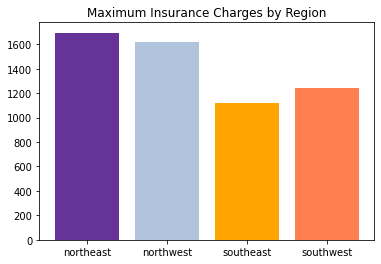

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = grouped_insurance_premium['region']
y = grouped_insurance_premium['max_charges']
colors = [ 'RebeccaPurple', 'LightSteelBlue', 'Orange','coral']
plt.bar(x,y, color = colors)
plt.title("Maximum Insurance Charges by Region")
plt.show()

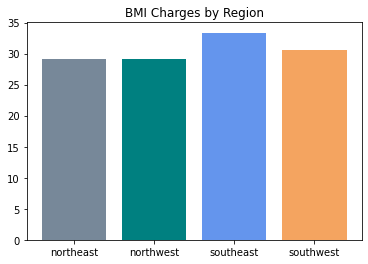

In [15]:
fig = plt.figure()
x = grouped_insurance_premium['region']
y = grouped_insurance_premium['mean_bmi']
colors = ['LightSlateGray', 'Teal', 'CornflowerBlue','SandyBrown']
plt.bar(x,y, color = colors)
plt.title("BMI Charges by Region")
plt.show()

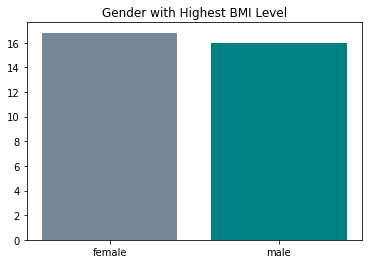

In [16]:
fig = plt.figure()
grouped_insurance_premium_1 = insurance_premium.groupby('sex', as_index=False)['bmi'].min()
x = grouped_insurance_premium_1['sex']
y = grouped_insurance_premium_1['bmi']
color = ['Pink', 'LightSlateGray']
plt.bar(x,y, color = colors)
plt.title("Gender with Highest BMI Level")
plt.show()

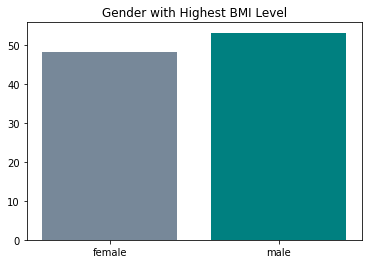

In [17]:
fig = plt.figure()
grouped_insurance_premium_1 = insurance_premium.groupby('sex', as_index=False)['bmi'].max()
x = grouped_insurance_premium_1['sex']
y = grouped_insurance_premium_1['bmi']
color = ['Pink', 'LightSlateGray']
plt.bar(x,y, color = colors)
plt.title("Gender with Highest BMI Level")
plt.show()

# Histograms to visualize frequences and distributions

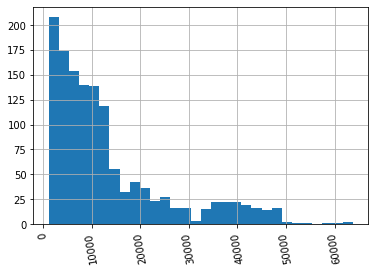

In [18]:
insurance_premium['charges'].hist(bins=30, xrot=100); 

The histogram above shows that the distribution is right-skewed showing that majority of observations have insurance charges below $10,000

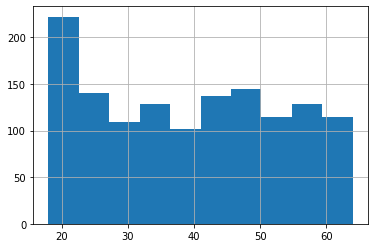

In [19]:
insurance_premium['age'].hist(); 

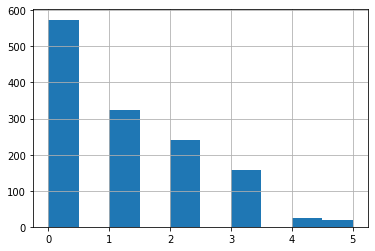

In [20]:
insurance_premium['children'].hist(); # builds and shows a histogram for the number of children by per observation

# Use Bee Swarm with Seaborn for nicely formatted plot

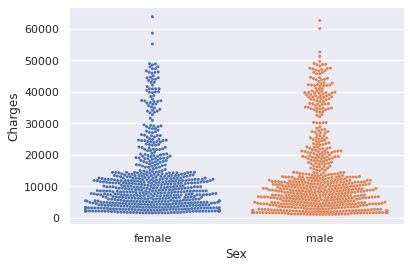

In [21]:
import seaborn as sns
sns.set()
sns.swarmplot(x = 'sex', y = 'charges',data=insurance_premium, s=3)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

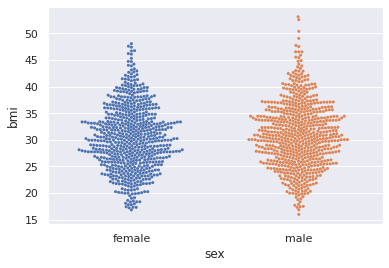

In [22]:
sns.swarmplot(x = 'sex', y = 'bmi',data=insurance_premium,s=3)
plt.xlabel('sex')
plt.ylabel('bmi');
plt.show()

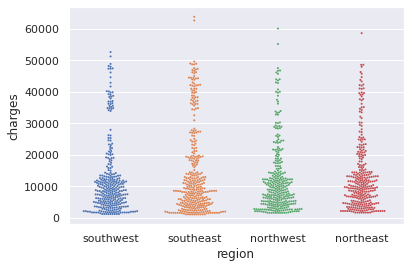

In [23]:
sns.swarmplot(x='region', y ='charges', data=insurance_premium, s=2)
plt.xlabel('region')
plt.ylabel('charges')
plt.show();

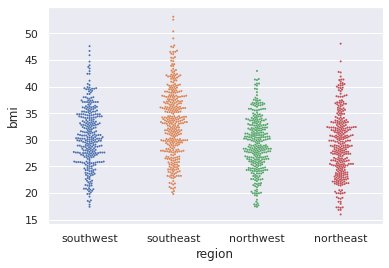

In [24]:
sns.swarmplot(x ='region', y ='bmi',s=2, data=insurance_premium)
plt.xlabel('region')
plt.ylabel('bmi')
plt.show()

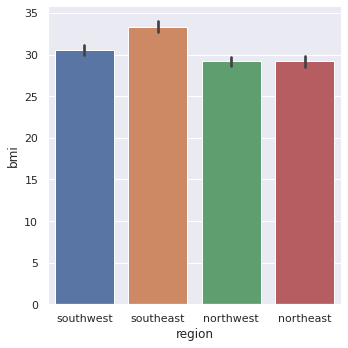

In [25]:
sns.catplot(x='region', y='bmi', # catplot specifies the categorical variable 'region' on the x-axis and the quantitative variable 'bmi' on the y-axis
              data=insurance_premium,
              kind='bar')
plt.show()

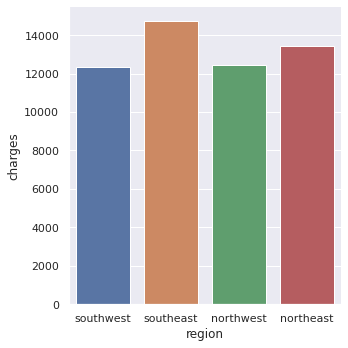

In [26]:
sns.catplot(x='region', y='charges', 
              data=insurance_premium,
              kind='bar',
              ci=None) # the confidence 'ci' level of the mean can be turned off by using ci=none
plt.show()

# Box Plot
#### To show the distribution of quantitative data to view the median, spread, skewness, and the outlier for easy comparisons between groups

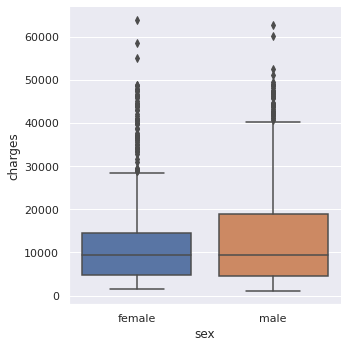

In [27]:
g=sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box')
plt.show()

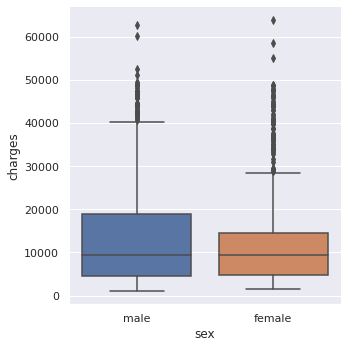

In [28]:
g=sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box',
             order=['male','female'])
plt.show()

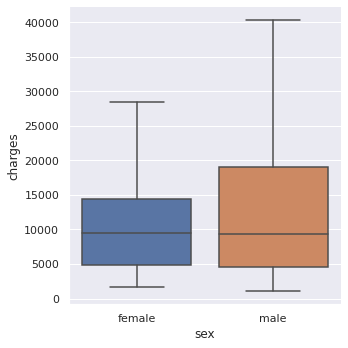

In [29]:
g=sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box',
             sym='') # use sym to omit the outlier or to change the appearance instead of omitting them
plt.show()

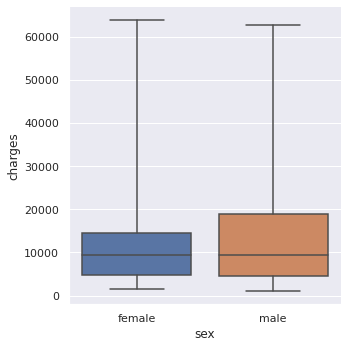

In [30]:
g=sns.catplot(x='sex', y='charges',
             data=insurance_premium,
             kind='box',
             whis=[0,100]) # whis can be use to change the appearance instead of omitting the outlier completely
plt.show()

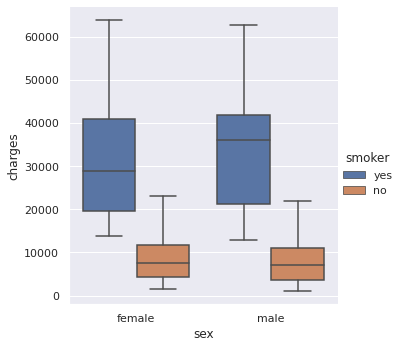

In [31]:
g=sns.catplot(x='sex', y='charges',
              data=insurance_premium,
              kind='box',
              hue='smoker',
              sym='') 
plt.show()

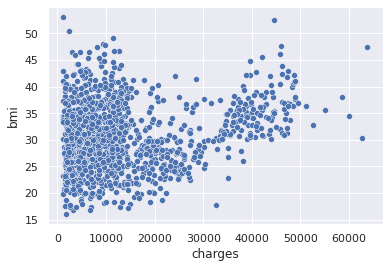

In [32]:
sns.scatterplot(x='charges', y='bmi', 
                data=insurance_premium)
plt.show()

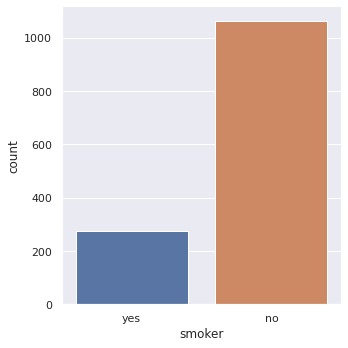

In [33]:
sns.catplot(x='smoker', 
              data=insurance_premium,
              kind='count')
plt.show()

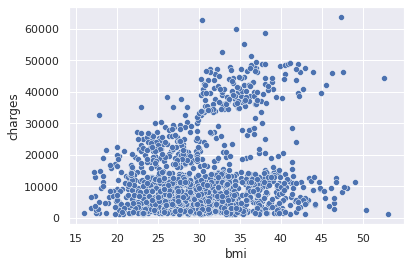

In [34]:
sns.scatterplot(x='bmi', y='charges', data=insurance_premium)
plt.show()

## Empirical Cumulative Distribution function (ECDF) 
##### Camptures all data around the plot edges 

# Relationship plot

### To see relationship between two quantitative variables

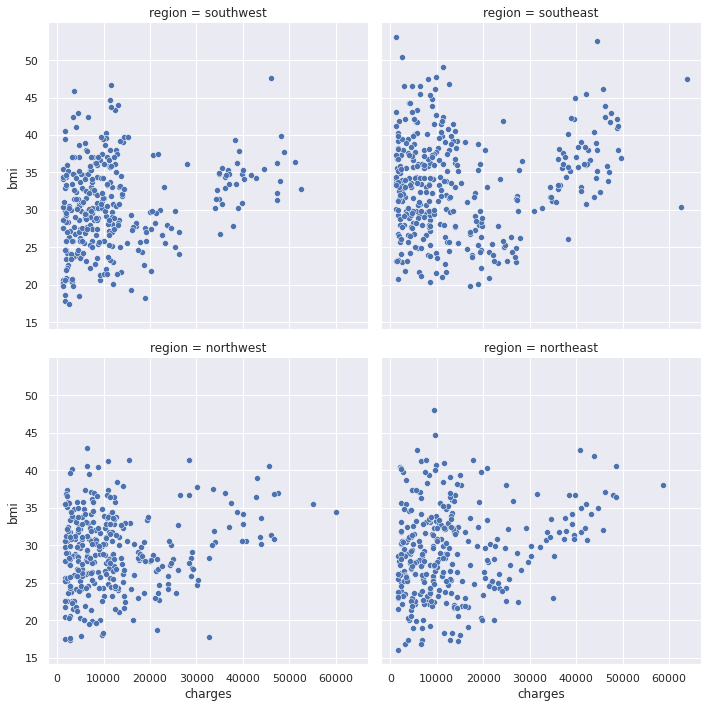

In [35]:
sns.relplot(x='charges', y='bmi',
            data=insurance_premium,
            kind='scatter', # 
            col='region',
            col_wrap=2)
plt.show()

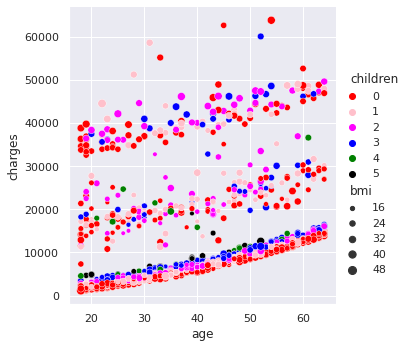

In [36]:
sns.relplot(x='age', y='charges',
            data=insurance_premium,
            kind='scatter',
            size='bmi', # point on the scatter plot to be sized based on the number of people in the region
            hue='children',
            palette=["red", "pink", "magenta","blue", "green", "black"]
            ) # helps to display regions with larger BMI charges with larger and darker color shades
plt.show()


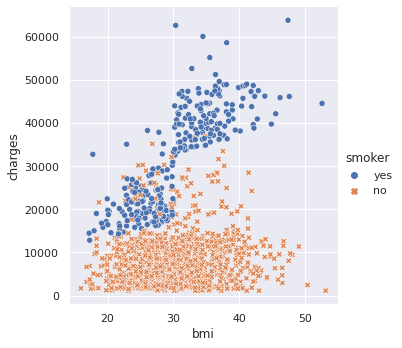

In [37]:
sns.relplot(x='bmi', y='charges',
            data=insurance_premium,
            kind='scatter',
            hue='smoker', 
            style='smoker') # styles ='' allows to better distinguish the groups by plotting smokers with a different point style in addition with a different color

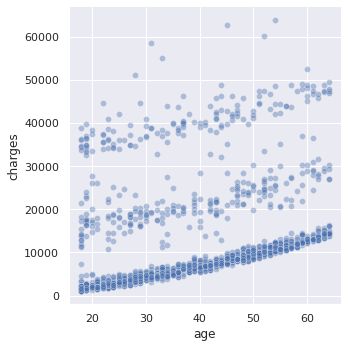

In [38]:
sns.relplot(x='age', y='charges',
            data=insurance_premium,
            kind='scatter',
            alpha=0.4) # point Transparency to see which areas of the scatter plot has more or less observations
plt.show()

## Statistical hypothesis testing


In [39]:
rand_num = np.random.randint(0,10) #generates a random integer

In [40]:
np.array

<function numpy.array>

In [41]:
array_from_range = np.arange(0,100) # one liner to make an array from a range

## Statistical Modeling

## Linear Regression

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=04eeb7cc-c014-42cc-9688-959f70fd96bb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>